# МЕТОДЫ ОБНАРУЖЕНИЯ ТОЧЕЧНЫХ АНОМАЛИЙ
Существует несколько вариантов классификации
существующих методик поиска аномалий. 


В зависимости от применяемого алгоритма результатом
работы системы идентификации аномалий может быть
либо метка экземпляра данных как аномального, либо
оценка степени вероятности того, что экземпляр является
аномальным.

Процесс выявления аномалий может проводиться для
данных различного формата:

* поток данных (работа в реальном времени);
* архив данных.


* A. **Режимы распознавания аномалий** 
Часто для решения задачи поиска аномалий требуется
набор данных, описывающих систему. Каждый экземпляр
в нем описывается меткой, указывающей, является ли он
нормальным или аномальным. Таким образом, множество
экземпляров с одинаковой меткой формируют соответствующий класс.
Создание подобной промаркированной выборки
обычно проводится вручную и является трудоемким и
дорогостоящим процессом. В некоторых случаях
получить экземпляры аномального класса невозможно в
силу отсутствия данных о возможных отклонениях в
системе, в других могут отсутствовать метки обоих
классов. В зависимости от того, какие классы данных
используются для реализации алгоритма, методы поиска
аномалий могут выполняться в одном из трех
перечисленных ниже режимов:


* **1) Supervised anomaly detection (режим распознавания с
учителем)**
Данная методика требует наличия обучающей выборки,
полноценно представляющей систему и включающей
экземпляры данных нормального и аномального классов.
Работа алгоритма происходит в два этапа: обучение и
распознавание. На первом этапе строится модель, с
которой в последствие сравниваются экземпляры, не
имеющие метки. В большинстве случаев предполагается,
что данные не меняют свои статистические
характеристики, иначе возникает необходимость изменять
классификатор.
Основной сложностью алгоритмов, работающих в
режиме распознавания с учителем, является
формирование данных для обучения. Часто аномальный
класс представлен значительно меньшим числом
экземпляров, чем нормальный, что может приводить к
неточностям в полученной модели. В таких случаях
применяется искусственная генерация аномалий.

* **2) Semi-Supervised anomaly detection (режим
распознавания частично с учителем)** 
Исходные данные при этом подходе представляют
только нормальный класс. Обучившись на одном классе,
система может определять принадлежность новых данных
к нему, таким образом, определяя противоположный.
Алгоритмы, работающие в режиме распознавания
частично с учителем, не требуют информации об
аномальном классе экземпляров, вследствие чего они
шире применимы и позволяют распознавать отклонения в
отсутствие заранее определенной информации о них.


* **3) Unsupervised anomaly detection (режим распознавания
без учителя)** 
Применяется при отсутствии априорной информации о
данных. Алгоритмы распознавания в режиме без учителя
базируются на предположении о том, что аномальные
экземпляры встречаются гораздо реже нормальных.
Данные обрабатываются, наиболее отдаленные определяются как аномалии. Для применения этой методики
должен быть доступен весь набор данных, т.е. она **не
может применяться в режиме реального времени** 

## SVM

Вариант метода опорных векторов, который отделяет выборку от начала координат. Использование ядер позволяет обойти сомнительное предположение о том, что объекты должны распологаться в дали от начала координат. По умолчанию, в качестве ядра используют лишь rbf (радиальные базисные функции), остальные ядра показывают плохие результаты.





In [14]:
from IPython.display import YouTubeVideo

YouTubeVideo('https://youtu.be/3liCbRZPrZA', width=800, height=300)

https://www.coursera.org/lecture/unsupervised-learning/odnoklassovyi-svm-EpMGE?authMode=signup&redirectTo=%2Flecture%2Funsupervised-learning%2Fodnoklassovyi-svm-EpMGE

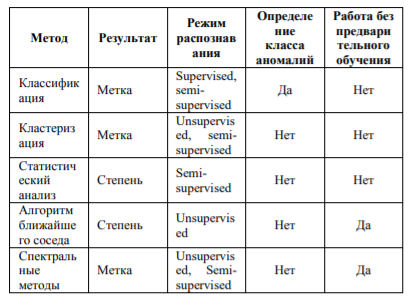

In [ ]:
# Python 2 and 3 compatibility
from __future__ import (absolute_import, division,
                        print_function, unicode_literals)
# отключим предупреждения Anaconda
import warnings
warnings.simplefilter('ignore')
import pandas as pd
%pylab inline
import seaborn as sns
import matplotlib.pyplot as plt

In [126]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor

In [127]:

import numpy as np 

In [128]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix, f1_score

# Анализ пользователей инстаграма по признаку бизнес-аккаунта

## 1. Описание набора данных и признаков (на понятном русском, желательно с картинками) 

### Описание
Данный проект решает задачу нахождения (классификации) аккаунтов в сети Инстаграм по публично доступным данным. Есть решение задачи, необходимо проанализировать аномалии , провести классификацию без аномалий.

### Данные
Набор данных представляет собой CSV файл с 1348 записями. Данные взяты преимущественно по русскоязычному сегменту сети. 

<li>IG_USER_ID - ID из SQL базы
<li>USER_ID - внутренний ID инстаграмма в текстовом виде. Узнать его можно тут например: http://jelled.com/instagram/lookup-user-id
<li>USER_ID_INT - он же в числовом виде
<li>IG_USER_NAME - имя пользователя в инстаграме
<li>F_MEDIA_NOW - количество фото и видео на близкий к текущему момент времени
<li>F_FOLLOWERS_NOW - количество фолловеров(подписчиков) на близкий к текущему момент времени
<li>F_FOLLOWING_NOW - количество подписок на других пользователей к текущему момент времени
<li>F_ISPRIVATE_NOW - является ли аккаунт закрытым на близкий к текущему момент времени
<li>F_IS_BUSINESS - метка коммерческого аккаунта (размечена руками) - я буду работать с ней
<li>F_IS_MALE - метка мужского аккаунта (размечена руками)
<li>F_IS_FEMALE - метка женского аккаунта (размечена руками) 


## 2. Первичный анализ признаков

In [129]:
ig_df =  pd.read_csv('IG.csv')
ig_df.head(3)

,IG_USER_ID,USER_ID,USER_ID_INT,IG_USER_NAME,F_MEDIA_NOW,F_FOLLOWERS_NOW,F_FOLLOWING_NOW,F_ISPRIVATE_NOW,F_IS_BUSINESS,F_IS_MALE,F_IS_FEMALE
0,3C03D796-15E3-E511-827A-6451063D545C,1000046583,1000046583,notonlywordss,966,1839,1250,0,1,0,0
1,1912D796-15E3-E511-827A-6451063D545C,1001343249,1001343249,walter_610,57,142,91,0,0,0,1
2,19D6BE97-15E3-E511-827A-6451063D545C,1008527849,1008527849,maximdjstem,517,5851,788,0,1,0,0


In [130]:
ig_df = ig_df.set_index('IG_USER_ID') #задействуем родной id из базы 


In [131]:
ig_df = ig_df.drop('USER_ID', 1) #оставим только один ID 

In [132]:
ig_df.head(3)

,USER_ID_INT,IG_USER_NAME,F_MEDIA_NOW,F_FOLLOWERS_NOW,F_FOLLOWING_NOW,F_ISPRIVATE_NOW,F_IS_BUSINESS,F_IS_MALE,F_IS_FEMALE
IG_USER_ID,,,,,,,,,
3C03D796-15E3-E511-827A-6451063D545C,1000046583,notonlywordss,966,1839,1250,0,1,0,0
1912D796-15E3-E511-827A-6451063D545C,1001343249,walter_610,57,142,91,0,0,0,1
19D6BE97-15E3-E511-827A-6451063D545C,1008527849,maximdjstem,517,5851,788,0,1,0,0


In [133]:
ig_df.describe(include = "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
USER_ID_INT,1348,NaN,NaN,NaN,1.31798e+09,8.35076e+08,58965,4.17764e+08,1.47105e+09,2.05573e+09,3.02554e+09
IG_USER_NAME,1348,1348,koshechkapuma,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
F_MEDIA_NOW,1348,NaN,NaN,NaN,326.928,651.809,0,35,120,341.25,8131
F_FOLLOWERS_NOW,1348,NaN,NaN,NaN,1647.86,4815.78,0,137,424,1406.5,130194
F_FOLLOWING_NOW,1348,NaN,NaN,NaN,2226.26,2516.59,0,171,908.5,4036.25,18224
F_ISPRIVATE_NOW,1348,NaN,NaN,NaN,0.147626,0.354861,0,0,0,0,1
F_IS_BUSINESS,1348,NaN,NaN,NaN,0.604599,0.489118,0,0,1,1,1
F_IS_MALE,1348,NaN,NaN,NaN,0.120178,0.32529,0,0,0,0,1
F_IS_FEMALE,1348,NaN,NaN,NaN,0.27003,0.44414,0,0,0,1,1


В выборке у нас пропусков нет, 60% коммерческих аккаунтов, 12% мужчин и 27% женщин. 

In [134]:
#выделим признаки и аттрибуты
X = ig_df.loc[:,:'F_ISPRIVATE_NOW']

In [135]:
X = X.drop('IG_USER_NAME',1)

In [136]:
Y_biz = ig_df['F_IS_BUSINESS'] 

ID считаем признаком, потому что он косвенно говорит о времени создания аккаунта. И порядок в нём имеет значение. 

## 3. Первичный визуальный анализ признаков 

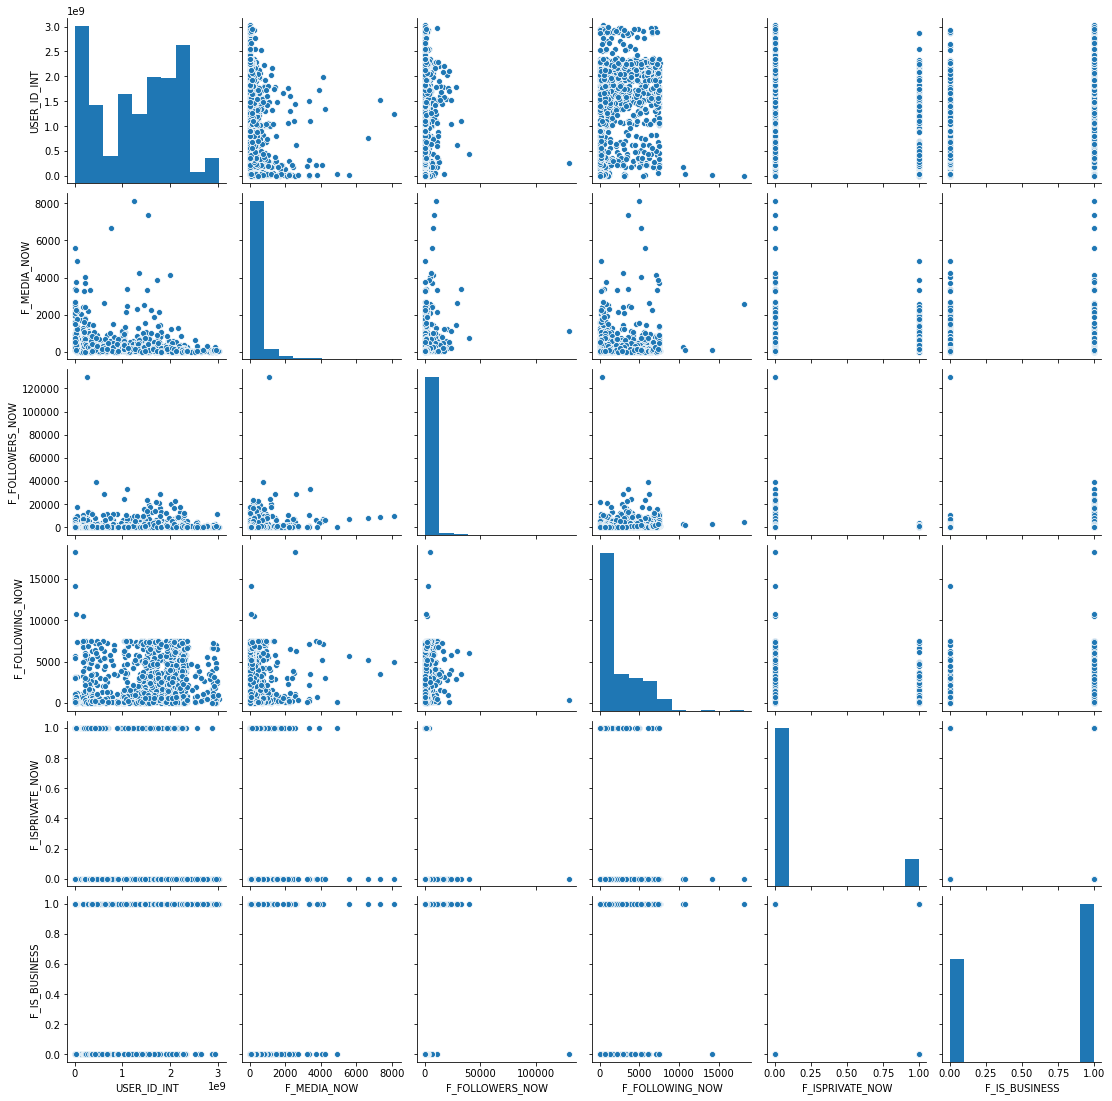

In [137]:
sns.pairplot(ig_df.loc[:,:'F_IS_BUSINESS'])

Чёткие прямоугольники в районе Following получаются, потому что ИГ не даёт аккаунтам следовать больше чем за 8000 других аккаунтов. Но когда-то было не так, оттуда остались всплески. Количество подписчиков и медиа распределены по степенному закону, но в случае подписок он немного другой и дальше мы увидим, что это не случайно.

## 4. Инсайты, обнаружение закономерности 

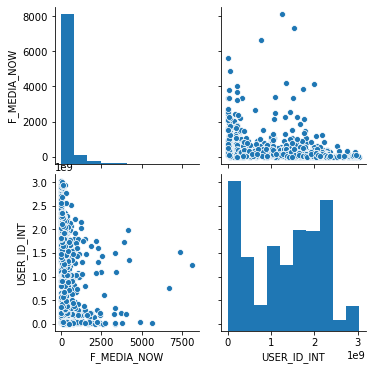

In [138]:
sns.pairplot(ig_df[['F_MEDIA_NOW','USER_ID_INT']])

Тут на графике видно: Чем моложе аккаунт, тем меньше у него постов. Но где-то начиная с середины истории (условно 2013 год) стали появляться другие аккаунты. Поэтому-то внутренний ID ИГ - это важный признак.   

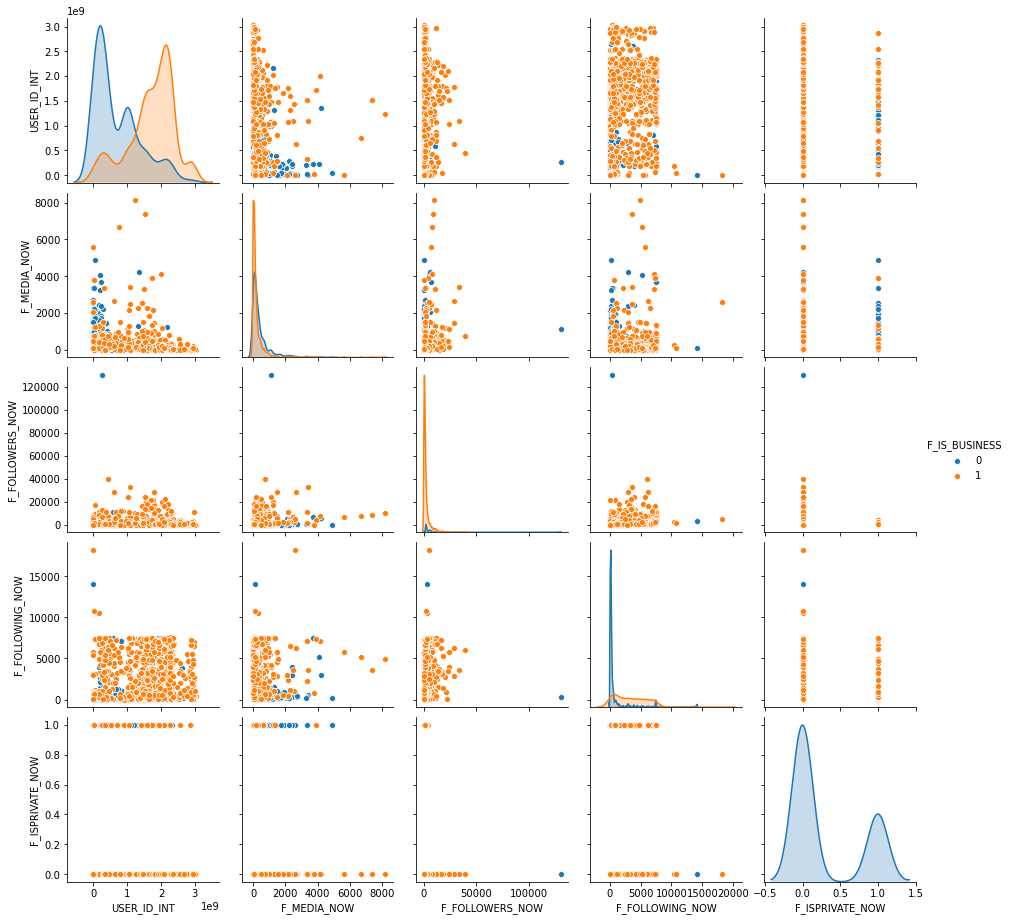

In [139]:
sns.pairplot(ig_df.loc[:,:'F_IS_BUSINESS'],hue="F_IS_BUSINESS")

при более пристальном анализе видно, что бизнес-аккаунты сильно зависят от ID и от FOLLOWING. Фактически большинство новых аккаунтов - это коммерческие аккаунты. 

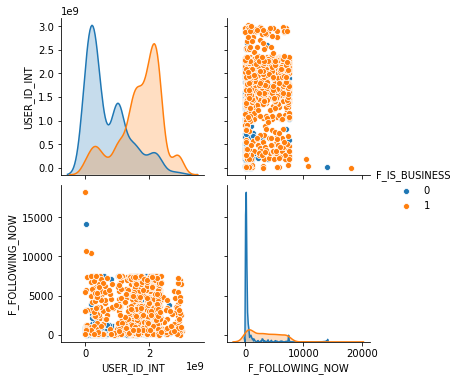

In [140]:
sns.pairplot(ig_df[['USER_ID_INT','F_FOLLOWING_NOW','F_IS_BUSINESS']],hue="F_IS_BUSINESS")

### обратите внимание на гистограммы по диагонали.

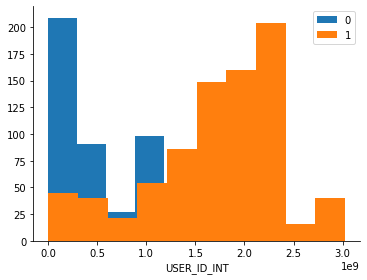

In [141]:
g = sns.FacetGrid(ig_df[['USER_ID_INT','F_IS_BUSINESS']], hue="F_IS_BUSINESS", size=4, aspect=1.3)
g.map(plt.hist, "USER_ID_INT", histtype='barstacked', stacked=True);
plt.legend();

In [142]:
def stackhist(x, y, **kws):
    grouped = pd.groupby(x, y)
    data = [d for _, d in grouped]
    labels = [l for l, _ in grouped]
    plt.hist(data, histtype="barstacked", label=labels)

In [143]:
stackhist(ig_df.USER_ID_INT, ig_df.F_IS_BUSINESS)
plt.title("User account age and commerce")
plt.legend()

AttributeError: module 'pandas' has no attribute 'groupby'

### это гистограмма по USER_ID_INT от меньшего к большему, т.е. от прошлого в будущее. Фактически коммерческие аккаунты сейчас являются основным источноком роста социальной сети

## 5. Оценим важность признаков

In [ ]:
X.head(3)

In [ ]:
forest = RandomForestClassifier(n_estimators=40)

forest.fit(X,Y_biz)

importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, X.columns[indices[f]], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

### Как и ожидалось ID оказалось очень важным признаком

## 6. Кросс-валидация

In [165]:

from  sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y_biz, 
                                                    test_size=0.1, 
                                                    random_state=42,
                                                   stratify = Y_biz)

In [166]:
forest = RandomForestClassifier(n_estimators=500)
forest.fit(X_train, y_train)
test_pred = forest.predict(X_test)

In [167]:
accuracy_score(y_test, test_pred)

0.8814814814814815

в данном кейсе случайное предсказание работает гораздо хуже леса 

In [168]:
f1_score(y_test, test_pred)

0.9012345679012346

И f1 нам намекает, что мы на правильном пути

In [169]:
from sklearn.tree import DecisionTreeClassifier # Ваш код здесь
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [170]:
from sklearn.model_selection import cross_val_score
import numpy as np 
from sklearn.model_selection  import GridSearchCV

подберем параметры  случайного леса

In [171]:
rf_tree_params = {'n_estimators': (250, 300, 350),
                  'min_samples_split' : list(range(1,5)),
               'max_depth': list(range(6,14)), 
               'min_samples_leaf': list(range(1,5))}
n_folds = 5

In [172]:
clf = RandomForestClassifier()

grid = GridSearchCV(clf, rf_tree_params, cv=n_folds, 
                    n_jobs=-1, scoring="f1")
grid.fit(X_train, y_train)
clf_best_score = grid.best_score_
clf_best_params = grid.best_params_
clf_best = grid.best_estimator_
mean_validation_scores = []
print("Лучший результат", clf_best_score, 
      "лучшие параметры", clf_best_params)

Лучший результат 0.9173436445351726 лучшие параметры {'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 250}


## 7. Проверяем сходимость модели

In [173]:
from sklearn.learning_curve import learning_curve

ModuleNotFoundError: No module named 'sklearn.learning_curve'

In [ ]:
def plot_with_std(x, data, **kwargs):
        mu, std = data.mean(1), data.std(1)
        lines = plt.plot(x, mu, '-', **kwargs)
        plt.fill_between(x, mu - std, mu + std, edgecolor='none',
                         facecolor=lines[0].get_color(), alpha=0.2)
        
def plot_learning_curve(clf, X, y, scoring, cv=5):
 
    train_sizes = np.linspace(0.05, 1, 20)
    n_train, val_train, val_test = learning_curve(clf,
                                                  X, y, train_sizes, cv=cv,
                                                  scoring=scoring)
    plot_with_std(n_train, val_train, label='training scores', c='green')
    plot_with_std(n_train, val_test, label='validation scores', c='red')
    plt.xlabel('Training Set Size'); plt.ylabel(scoring)
    plt.legend()

In [ ]:
plot_learning_curve(RandomForestClassifier(min_samples_split=2, n_estimators=350, max_depth=7, min_samples_leaf=4),
                   X_train, y_train, scoring='f1', cv=10)

In [ ]:
plot_learning_curve(RandomForestClassifier(min_samples_split=2, n_estimators=350, max_depth=7, min_samples_leaf=4),
                   X_train, y_train, scoring='roc_auc', cv=10)

In [ ]:
plot_learning_curve(RandomForestClassifier(min_samples_split=2, n_estimators=350, max_depth=7, min_samples_leaf=4),
                   X_train, y_train, scoring='accuracy', cv=10)

Согласно F1 данных достаточно, но ROC и Accuracy намекают, что данных можно было бы взять ещё. 

### Бустинг

In [ ]:
from sklearn.learning_curve import validation_curve

def plot_validation_curve(clf, X, y, cv_param_name, 
                          cv_param_values, scoring):

    val_train, val_test = validation_curve(clf, X, y, cv_param_name,
                                           cv_param_values, cv=5,
                                                  scoring=scoring)
    plot_with_std(cv_param_values, val_train, 
                  label='training scores', c='green')
    plot_with_std(cv_param_values, val_test, 
                  label='validation scores', c='red')
    plt.xlabel(cv_param_name); plt.ylabel(scoring)
    plt.legend()

In [ ]:
estimators = np.arange(25, 350, 25)
plot_validation_curve(RandomForestClassifier(min_samples_split=2, 
                                             max_depth=7, min_samples_leaf=4), X_train, y_train, 
                      cv_param_name='n_estimators', 
                      cv_param_values= estimators,
                   scoring='roc_auc')

Видно, что количество деревьев не влияет. 

In [ ]:
depth = np.arange(3, 25)
plot_validation_curve(RandomForestClassifier(min_samples_split=2, n_estimators = 350
                                             , min_samples_leaf=4), X_train, y_train, 
                      cv_param_name='max_depth', 
                      cv_param_values= depth,
                   scoring='roc_auc')

Больше 10 делать глубину нет смысла. 

In [ ]:
final_forest = RandomForestClassifier(min_samples_split=2, n_estimators=350, max_depth=7, min_samples_leaf=4)
final_forest.fit(X_train, y_train)
final_pred = final_forest.predict(X_test)
accuracy_score(y_test, final_pred), f1_score(y_test, final_pred),roc_auc_score(y_test, final_pred)

Построена модель классификации коммерческих аккаунтов в социальной сети Инстаграмм. Данная модель даёт примерно 90% точности на отложенных 10% выборки. Данный результат устойив к способу измерения погрешности, а именно достижим на метриках Accuracy, F1, ROC_AUC. 

Глубина 7 найденная жадным поиском в принципе оптимальна. Дальше модель получается слегка переобучена. 

Главный инсайт в том, что данная социальная сеть продолжает свой рост в основном за счёт коммерческих аккаунтов, а не частных. Рост частных сходит на нет, а рост коммеррческих набирает обороты. А так же в том, что не заглядывая в фотографии и не читая текстов по формальным признакам можно отсекать спам в ИГ с хорошей вероятностью. Недостатком метода является то, что модели и способы работы коммерческих аккаунтов или паттерны поведения частных лиц могут существенно поменяться со временем и данная модель потеряет актуальность. 

# Оценка аномалий

Процент "выбросов", задаваемый пользователем. Ищем 1% выбросов в данных, то есть ограничимся 1 процентом «странных» аккаунтов. 


In [174]:
OUTLIER_FRACTION = 0.01

In [175]:
from __future__ import division, print_function
# отключим всякие предупреждения Anaconda
import warnings
warnings.filterwarnings('ignore')
%pylab inline
figsize(12,8)
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.covariance import EllipticEnvelope
from sklearn.svm import OneClassSVM

import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.preprocessing import scale
from sklearn import svm
from scipy import stats
from sklearn.decomposition import PCA

Populating the interactive namespace from numpy and matplotlib


**Для обнаружения «выбросов» в данных используем одноклассовую машину опорных векторов. 
Создаем SVM классификатор с гауссовым ядром.**

In [176]:
svm_clf = svm.OneClassSVM(kernel="rbf")

**"Скармливаем" ему данные.**

In [177]:
svm_clf.fit(X)

OneClassSVM()

**В результате обучения алгоритма получаем вектор
индикаторов, является ли объект "выбросом".**

In [178]:
## Поиск выбросов

In [179]:
dist_to_border = svm_clf.decision_function(X).ravel()
threshold = stats.scoreatpercentile(dist_to_border,
            100 * OUTLIER_FRACTION)
is_outlier = dist_to_border < threshold

In [180]:
X[is_outlier]

,USER_ID_INT,F_MEDIA_NOW,F_FOLLOWERS_NOW,F_FOLLOWING_NOW,F_ISPRIVATE_NOW
IG_USER_ID,,,,,
5B323E86-53E8-E511-827A-6451063D545C,2950088460,16,7,52,0
647B8294-A4E8-E511-827B-6451063D545C,3025543889,11,71,431,0
BBB8CF9A-72E9-E511-827B-6451063D545C,2965209888,22,578,6982,0
5F323E86-53E8-E511-827A-6451063D545C,2981097985,17,146,576,0
627B8294-A4E8-E511-827B-6451063D545C,2974379568,55,1100,6528,0
BCB8CF9A-72E9-E511-827B-6451063D545C,2974313905,62,866,2467,0
88CBF19B-E4EE-E511-827B-6451063D545C,2963621755,7,45,250,0
5E323E86-53E8-E511-827A-6451063D545C,2970799751,62,11222,2721,0
5D323E86-53E8-E511-827A-6451063D545C,2954377109,25,41,15,0


**Масштабируем данные.**

In [181]:

XX = scale(X) 
XX

array([[-0.38086593,  0.98082337,  0.03970485, -0.38807555, -0.41616593],
       [-0.3793126 , -0.41427531, -0.3128094 , -0.84879061, -0.41616593],
       [-0.37070588,  0.29171522,  0.87310917, -0.57172556, -0.41616593],
       ...,
       [ 1.63173555, -0.40506673, -0.2912057 , -0.43696939, -0.41616593],
       [-1.57335905,  0.26562427, -0.330674  , -0.8448155 , -0.41616593],
       [ 0.96508633, -0.41887959, -0.32215715, -0.61266917, -0.41616593]])

**Выделяем в них две главные компоненты.**

In [182]:
XX = PCA(n_components=2).fit_transform(XX)

In [183]:
XX

array([[ 0.49577102,  0.62772127],
       [ 0.36420702, -0.64439786],
       [ 0.24696776,  0.68357838],
       ...,
       [-1.06838555, -0.88256659],
       [ 1.29556641,  0.01033613],
       [-0.57348884, -0.83922715]])

In [184]:
# визуализация

In [298]:
svm_clf = svm.OneClassSVM(kernel="rbf")


In [299]:
svm_clf.fit(XX)

OneClassSVM()

In [300]:
dist_to_border = svm_clf.decision_function(XX).ravel()
threshold = stats.scoreatpercentile(dist_to_border,
            100 * OUTLIER_FRACTION)
is_outlier = dist_to_border < threshold

In [301]:
XX[is_outlier]

array([[-1.05355425,  4.8495885 ],
       [ 0.07233994,  7.61014202],
       [ 2.35083454,  7.95171845],
       [-0.13835903,  5.03410327],
       [-0.32162866,  6.73066406],
       [ 0.92787438,  4.97046813],
       [-2.85469423, 18.59994628],
       [ 2.30724626,  7.59321329],
       [ 1.58124451,  4.78304434],
       [ 2.28306956,  6.67675551],
       [ 4.72354503,  4.0852312 ],
       [-1.48877688,  5.05509978],
       [ 2.60453885,  9.14369529],
       [-1.35161094,  6.409557  ]])

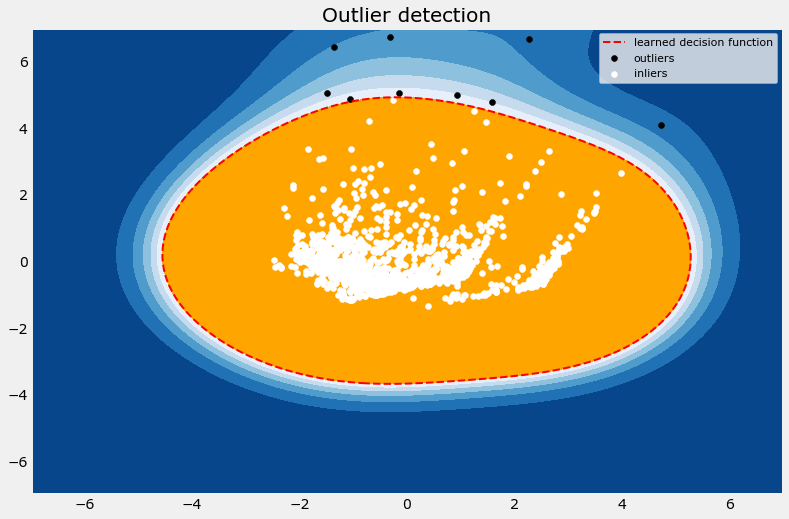

In [302]:
num = XX.shape[0]
xx, yy = np.meshgrid(np.linspace(-7, 7, 500), np.linspace(-7, 7, 500))
n_inliers = int((1. - OUTLIER_FRACTION) * num)
n_outliers = int(OUTLIER_FRACTION * num)
Z = svm_clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.title("Outlier detection")
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), threshold, 7),
                         cmap=plt.cm.Blues_r)
a = plt.contour(xx, yy, Z, levels=[threshold],
                            linewidths=2, colors='red')
plt.contourf(xx, yy, Z, levels=[threshold, Z.max()],
                         colors='orange')
b = plt.scatter(XX[is_outlier, 0], XX[is_outlier, 1], c='black')
c = plt.scatter(XX[is_outlier == 0, 0], XX[is_outlier == 0, 1], c='white')
plt.axis('tight')
plt.legend([a.collections[0], b, c],
           ['learned decision function', 'outliers', 'inliers'],
           prop=matplotlib.font_manager.FontProperties(size=11))
plt.xlim((-7, 7))
plt.ylim((-7, 7));

Вопрос: изменится ли качество классификатора после удаления выбросов?
 Как определить параметр   OUTLIER_FRACTION  ? 
    

# Изолирующий Лес (Isolation Forest)


**Isolation Forest** ([оригинальная статья](https://cs.nju.edu.cn/zhouzh/zhouzh.files/publication/icdm08b.pdf?q=isolation-forest)) «изолирует» наблюдения следующим образом:
1. сначала, случайным образом выбирается признак,
2. затем, случайным образом выбирает *разделяющее значение* (split value) между максимальным и минимальным значениями выбранного признака.

Поскольку рекурсивное разбиение может быть представлено древовидной структурой, количество разбиений, необходимых для выделения объекта, эквивалентно длине пути от корневого узла до конечного узла. 

* для каждого наблюдения рассчитывается средняя длина пути до него в случайном дереве

* деревья со случайными разбиениями с целью изолировать наблюдения
чем короче средняя длина пути тем проще описать наблюдение

* тем в более изолированной части пространства оно находится
чем больше разбиений нужно для наблюдения, нормальнее оно

<img src="https://miro.medium.com/max/1400/1*TqkqI2QECywBLnY6KlVvHA.png" width="600">



Эта длина пути, усредненная по лесу таких случайных деревьев, является мерой нормальности и нашей решающей функции.

$$\Large s(x, n) = 2^{-\frac{E(h(x))}{c(n)}}$$

где
- $h(x)$ - длина пути до наблюдения $x$
- $c(n)$ - средняя длина пути неудачного поиска в бинарном дереве поиска
- $n$ - количество внешних узлов

При случайном разбиение, для аномальных объектов пути получаются заметно более короткими, чем для "нормальных" объектов. Следовательно, когда лес случайных деревьев в совокупности дает более короткие длины пути для конкретных объектов, они с большой вероятностью могут быть аномалиями.

In [210]:
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore")


%matplotlib inline

In [239]:
# ФУнкция Обнаружения выбросов

from sklearn.metrics import precision_recall_curve, roc_curve

def plot_level_lines(model, data, size=100):
    def _expand(a, b, frac=.5, margin=1.):
        return a - abs(a) * frac - margin, b + abs(b) * frac + margin

    # Вспомогательная функция для рисования линий уровня и набора точек
    plt.figure(figsize=(10, 7))
    min_x, min_y = data.min(axis=0)
    max_x, max_y = data.max(axis=0)
    min_x, max_x = _expand(min_x, max_x)
    min_y, max_y = _expand(min_y, max_y)

    # создаём регулярную сетку для контуров
    all_x = np.linspace(min_x, max_x, num=size)
    all_y = np.linspace(min_y, max_y, num=size)
    XX, YY = np.meshgrid(all_x, all_y)
    test_data = np.c_[XX.ravel(), YY.ravel()]

    # опрашиваем предсказания модели
    try:
        predictions = model.decision_function(test_data).reshape(size, size)
        data_scores = model.predict(data)
        anomaly_scores = model.decision_function(data)

    except AttributeError:
        predictions = model._decision_function(test_data).reshape(size, size)
        data_scores = model._predict(data)
        anomaly_scores = model._decision_function(data)

    # создаём график контуров с заливкоц
    plt.contourf(all_x, all_y, predictions, cmap=plt.cm.coolwarm)

    # отображаем границу принятия решений
    threshold = anomaly_scores[data_scores==1.0].min()
    plt.contour(XX, YY, predictions, levels=[threshold], linewidths=2, colors='darkred')

    # нарисуем точки выборки
    plt.scatter(data[:, 0], data[:, 1])

    axes = plt.gca()
    axes.set_xlim([min_x,max_x])
    axes.set_ylim([min_y,max_y])

    plt.show()
    plt.close()

In [228]:
from sklearn.metrics import precision_recall_curve, roc_curve


def plot_results(y_test, probabilities):
    # построим кривые ROC и PR
    fpr, tpr, _ = roc_curve(y_test, probabilities)
    
    # roc
    plt.plot(fpr, tpr, linewidth=3)
    plt.xlabel('FPR')
    plt.ylabel('TPR')

    plt.grid(True)
    plt.show()

In [229]:

from sklearn.ensemble import IsolationForest

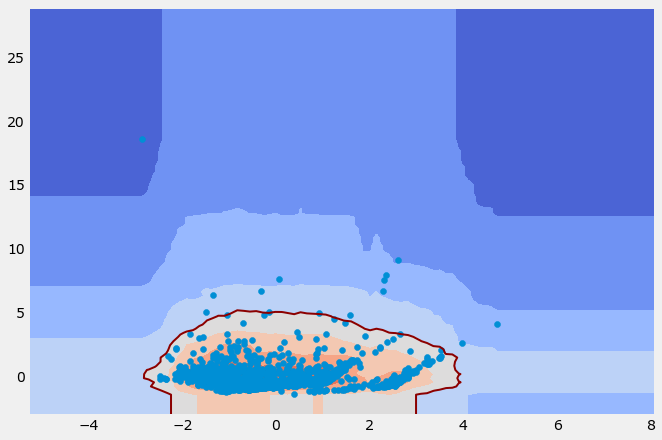

In [270]:
model = IsolationForest(n_estimators=100,
                        contamination=0.01,
                        max_features=1.0,
                        max_samples=1.0,
                        bootstrap=True,
                        random_state=0)
model.fit(XX)

plot_level_lines(model, XX)

# Библиотека PyOD

In [286]:
!pip install pyod

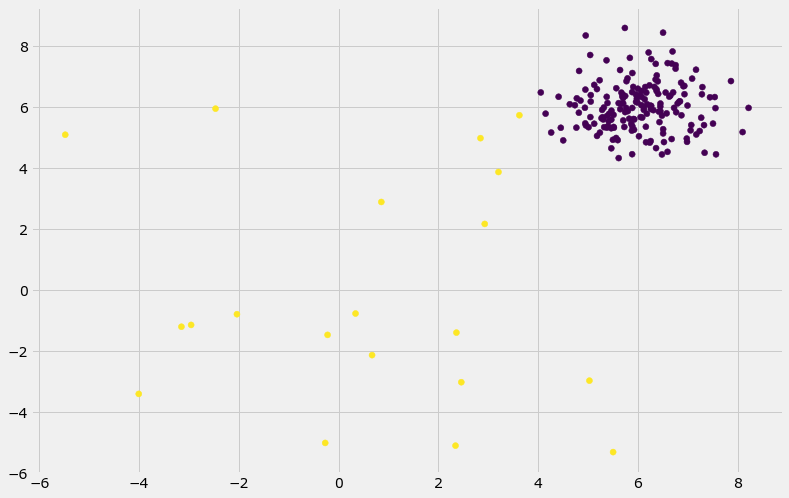

In [288]:
from pyod.utils.data import generate_data

contamination = 0.1  # процент аномалий
n_train = 200  # количество тренировочных данных
n_test = 100  # количество тестовых данных

# Сгенерируем данные
X_train, y_train, X_test, y_test = \
    generate_data(n_train=n_train,
                  n_test=n_test,
                  n_features=2,
                  contamination=contamination,
                  random_state=42)

plt.scatter(X_train[:,0], X_train[:,1], c=y_train)
plt.show()

Выброс - это точка, удаленная от соседних точек (т.е. чем дальше точка от своих соседей, тем больше вероятность того, что это выброс).

<img src="https://miro.medium.com/max/848/1*W3anCSUzDwHzTM1BOAd5cA.png" width="400">

In [290]:
from pyod.models.knn import KNN   # kNN detector

# обучим kNN
clf_name = 'KNN'
clf = KNN()
clf.fit(X_train)

y_train_pred = clf.labels_  # бинарные метки (0: норма, 1: выбросы)
y_train_scores = clf.decision_scores_

# предсказание на тесте
y_test_pred = clf.predict(X_test)
y_test_scores = clf.decision_function(X_test)

In [ ]:
Посмотрим на качество алгоритма

In [291]:
from pyod.utils.data import evaluate_print

print("\nOn Training Data:")
evaluate_print(clf_name, y_train, y_train_scores)

print("\nOn Test Data:")
evaluate_print(clf_name, y_test, y_test_scores)


On Training Data:
KNN ROC:0.9992, precision @ rank n:0.95

On Test Data:
KNN ROC:1.0, precision @ rank n:1.0


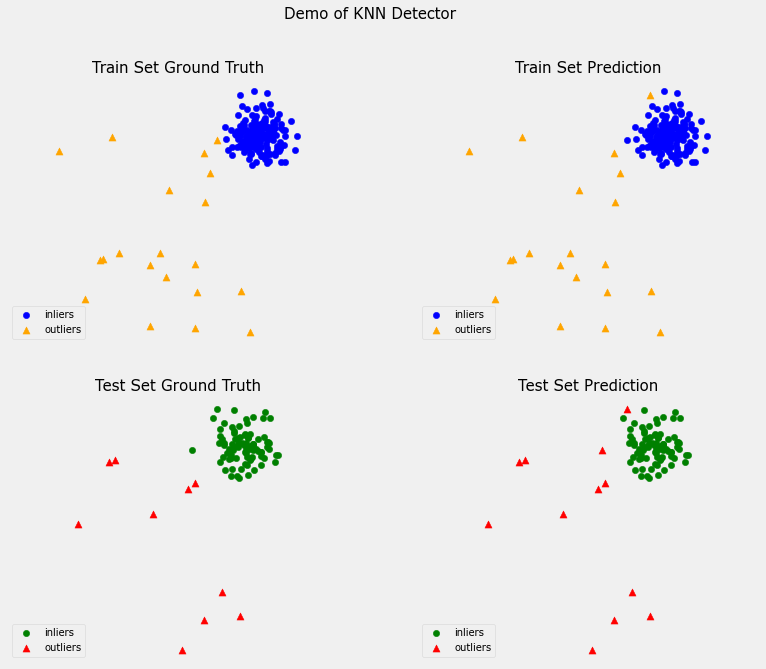

In [292]:
from pyod.utils.example import visualize
    
visualize(clf_name, X_train, y_train, X_test, y_test, y_train_pred,
    y_test_pred, show_figure=True, save_figure=False)

In [ ]:
Источники:
    
http://ceur-ws.org/Vol-1864/paper_33.pdf